In [66]:
import keras 
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
from keras.callbacks import History 
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras.callbacks import History 
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from google.colab import files #para bajar imagenes del google colabs p/ informe
from keras.preprocessing.image import ImageDataGenerator

In [67]:
#cargo un modelo pre entrenado de keras como base, por ejemplo, la vgg16
model_1 =  VGG16(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=10)
model_1.trainable = False #en principio no lo entreno, dejo fijos sus pesos iniciales del imagenet
#de la documentacion de keras (https://keras.io/api/applications/vgg/#vgg16-function):
#include_top = False basicamente me saca la primera capa de entrada con el size de la imagenet
#weights = 'imagenet' son los pre entrenados para esa red
#input_shape = (32,32,3) es tamaño de las imgs de cifar10
#clases = 10 es la cantidad de clases del cifar10

In [68]:
#cargo los datos del cifar10, los separo en entrenamiento, test y validacion
(x_train,y_train),(x_test,y_test) = cifar10.load_data() 
yy_train = to_categorical(y_train)
yy_test = to_categorical(y_test)
print('cantidad img de train: ',x_train.shape[0])
print('cantidad img de test: ',x_test.shape[0])

cantidad img de train:  50000
cantidad img de test:  10000


In [69]:
#uso data augmentation en el training set
#como hicimos en el ejercicio 10 del practico pasado
datagen = ImageDataGenerator(rotation_range=15,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
train_aug = datagen.fit(x_train)

In [70]:
epocas = 100
mean = np.mean(x_train,axis=0)
sigma = np.std(x_train,axis=0) 
x_train = (x_train - mean)/sigma
x_test = (x_test - mean)/sigma

In [71]:
model = keras.models.Sequential()
model.add(model_1)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='sgd',loss=keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['acc'])
model.summary()
history = model.fit(x_train, yy_train,epochs=epocas,shuffle=True,validation_data=(x_test, yy_test),batch_size=128,verbose=2)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_27 (Flatten)         (None, 512)               0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_99 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_100 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_101 (Dense)            (None, 10)              

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

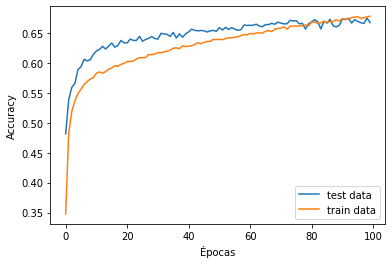

In [72]:
plt.plot(history.history['val_acc'],label='test data')
plt.plot(history.history['acc'],label='train data')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('ej3_1_accepoch.pdf')
files.download('ej3_1_accepoch.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

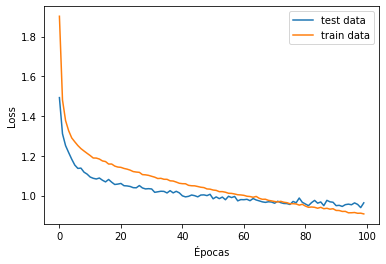

In [73]:
plt.plot(history.history['val_loss'],label='test data')
plt.plot(history.history['loss'],label='train data')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.savefig('ej3_1_lossepoch.pdf')
files.download('ej3_1_lossepoch.pdf')

In [74]:
#paso a una etapa de fine-tuning 
model_1.trainable = True #ahora es entrenable
model.summary()
optimizer = keras.optimizers.SGD(1e-5)
model.compile(optimizer,loss=keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['acc'])
epocas = 50
history = model.fit(x_train, yy_train,epochs=epocas,shuffle=True,validation_data=(x_test, yy_test),batch_size=128,verbose=2)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_27 (Flatten)         (None, 512)               0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_99 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_100 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_101 (Dense)            (None, 10)              

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

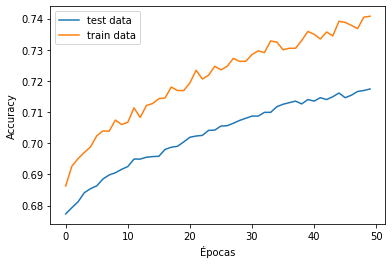

In [75]:
plt.plot(history.history['val_acc'],label='test data')
plt.plot(history.history['acc'],label='train data')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('ej3_2_accepoch.pdf')
files.download('ej3_2_accepoch.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

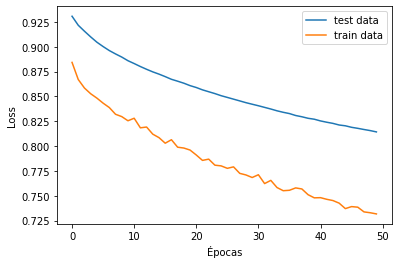

In [76]:
plt.plot(history.history['val_loss'],label='test data')
plt.plot(history.history['loss'],label='train data')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.savefig('ej3_2_lossepoch.pdf')
files.download('ej3_2_lossepoch.pdf')